In [2]:
import freetype as F  # for loading fonts
import matplotlib.pyplot as plt  # matplotlib is a plotting library. Some modules have typical import names (here: 'plt'). It's a Python convention.
import requests  # Builtin library for requests.


from bs4 import BeautifulSoup  # beautiful soup libary for grabbing data from html base
from PIL import Image  # Python image library. Please note not all library names are the same as import names. For example, this one is called 'pillow'

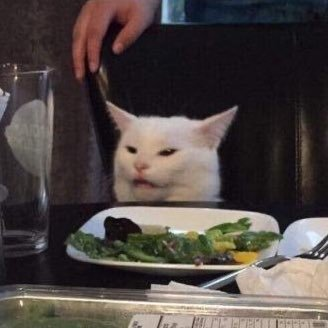

In [3]:
# grabbing an image from url
image_url = 'https://pbs.twimg.com/profile_images/1189661651521413123/8gS67MVi_400x400.jpg'
response = requests.get(image_url, stream=True)
img = Image.open(response.raw)

img

## Making Images from Text
Something a little bit different now. ASCII images are always fun and there are plenty of tools out there to convert a JPG or PNG into an ASCII text-based image. But perhaps there's something nice about using the text as the starting point - so the characters used are characters which have appeared in the text above.

First we need to do a bit more cleaning. The raw text will contain escape characters which are invisible and are mostly used for formatting, so these will just get in the way. I will use a snippet I found here on Stackoverflow to strip out all the escape chars.

If you look at the [ASCII character codes](https://www.ascii-code.com/) you will see that characters 0-31 are 'control characters' (or escape chars). So by using char() we can convert the code into it's actual ASCII representation to make a list of escape chars.

Then we can use maketrans() in a slightly unusual way. The third argument takes a list which are just characters to remove from the string. This does the job nicely.

The outcome of the cell below will be the raw text without any escape chars.

In [4]:
# Let's get the html again
URL = "https://en.wikipedia.org/wiki/Cat"
data = requests.get(URL)
html_text = data.text  # raw text

root_soup = BeautifulSoup(html_text, "html.parser").html
p_tags = root_soup.find_all(['p']) # all paragraph tags
html_p_tag_text = ' '.join([p_tag.text for p_tag in p_tags])

In [5]:
escapes = ''.join([chr(char) for char in range(1, 32)])
translator = str.maketrans('', '', escapes)
cleaned_html_p_tag_text = html_p_tag_text.translate(translator)

Next we need to sort our characters by how dark they are. Darkness, in this case, will be defined as to how densely black a character is, where # will be darker than O which will be darker that ..

Using this snippet as a starting point and using a font which is found in the folder of this week.

We will convert the raw text into a set which is like a list but will have no repeated elements.

We won't go into this in too much detail, but we essentially iterate over each char in the set, use this to load the respective letter from the font, sum it's bitmap buffer to find out it's darkness value, and then sort this all by wrapping it in sorted().

In [6]:
# converts the raw text to a set of characters
no_repeats = set(cleaned_html_p_tag_text)

# Loads the font file from the folder. Make sure the file is also in the my-practice folder
# where you are running your own notebook
f = F.Face('Ubuntu-M.ttf')
f.set_char_size(99)
sorted_chars = sorted([(f.load_char(c) or sum(f.glyph.bitmap.buffer) ,c) for c in no_repeats])

In [7]:
print(sorted_chars)
print(len(sorted_chars))

[(0, ' '), (0, '\xa0'), (17, '.'), (29, "'"), (31, '-'), (33, ','), (36, ':'), (51, ';'), (52, '–'), (55, '~'), (56, '°'), (58, '"'), (77, '*'), (78, 'i'), (81, 'r'), (83, 'í'), (88, 'ī'), (89, 'I'), (89, 'î'), (95, 'l'), (101, '?'), (106, 'j'), (107, '('), (108, '1'), (108, 'c'), (112, 'ط'), (112, 'ق'), (112, 'َ'), (112, 'ِ'), (112, 'ّ'), (112, 'ṭ'), (112, '\u200a'), (112, '\u200e'), (114, ')'), (114, '/'), (114, 'v'), (116, 's'), (119, 'J'), (121, 't'), (123, 'L'), (123, 'x'), (124, '7'), (125, 'f'), (129, 'z'), (134, ']'), (136, 'T'), (136, '['), (142, 'n'), (145, 'Y'), (147, 'a'), (148, 'u'), (148, 'y'), (151, 'F'), (152, '2'), (152, '5'), (152, 'e'), (156, '3'), (156, 'o'), (156, 'ž'), (162, 'C'), (163, '9'), (164, '4'), (164, '6'), (167, 'S'), (167, 'k'), (168, '0'), (168, 'á'), (168, 'ė'), (170, 'μ'), (171, 'h'), (174, 'ä'), (176, 'V'), (180, 'p'), (182, 'P'), (182, 'Z'), (182, 'q'), (183, 'ö'), (191, 'E'), (191, 'b'), (192, 'd'), (193, 'A'), (194, 'U'), (196, 'G'), (197, 'g'), 

###  <span style="color:red"> Exercise 4 </span>
Try loading using another font file from [here](https://www.1001freefonts.com/) and get a value for the charater darkness as seen above. Are the values different?

In [8]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

Next we load an image using Sci-Kit Image which has a bunch of images you can load very easily as [NumPy](https://www.w3schools.com/python/numpy/numpy_intro.asp) arrays.

Let's also make it a bit smaller.

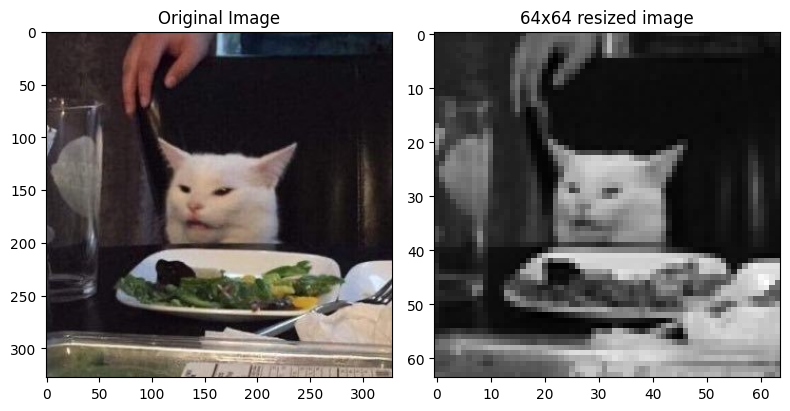

In [9]:
IMG_SIZE = 64

# resize and convert to greyscale
smaller_img = img.resize((IMG_SIZE, IMG_SIZE)).convert('L')


# create a space for plotting data with matplotlib.pyplot (plt)
# fig is the whole plotting space, axes are the spaces for individual plots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes

ax[0].imshow(img)
ax[0].set_title("Original Image")

ax[1].imshow(smaller_img, cmap='gray')
ax[1].set_title(f"{IMG_SIZE}x{IMG_SIZE} resized image")

fig.tight_layout()
plt.show()

Now all we need to do is iterate over each pixel in the image and find it's corresponding ASCII character based on the darkess of the pixel.

All the chars are in sorted_chars.

Each pixel will have a value between 0 and 1, we need to scale this value up to the length of sorted_chars, so we can use that as an index. So we scale 0->1 up to 0->len(sorted_chars).

I like to do this by dividing 1 by the total size, which is len(sorted_chars), then to scale our pixel values we just divide those by that value.

See below

In [10]:
step = 1 / len(sorted_chars)
print(step)
print(0.1 / step)
print(0.5 / step)
print(0.7 / step)

0.01
10.0
50.0
70.0



To use these as an index in our array we need to convert these to ints (we can't index with a float).

The cell below produces the ASCII image as a list of lists.

In [11]:
img_data = smaller_img.getdata()
ascii_img = []
for column in range(IMG_SIZE):
    ascii_row = []
    for row in range(IMG_SIZE):

        pixel_index = column * IMG_SIZE + row
        pixel_value = img_data[pixel_index] / 255
        
        # mapping the pixel value to the character index in the 
        char_index = max(0, int(pixel_value / step) - 1)
        ascii_row.append(sorted_chars[char_index][1])
    ascii_img.append(ascii_row)

In [12]:
list(smaller_img.getdata())

[39,
 36,
 37,
 39,
 38,
 37,
 48,
 44,
 39,
 39,
 36,
 35,
 36,
 36,
 35,
 32,
 48,
 94,
 96,
 93,
 101,
 105,
 107,
 105,
 105,
 104,
 110,
 115,
 109,
 98,
 75,
 98,
 163,
 103,
 94,
 87,
 32,
 24,
 19,
 18,
 24,
 28,
 29,
 35,
 39,
 40,
 39,
 41,
 42,
 34,
 26,
 25,
 29,
 27,
 26,
 28,
 31,
 27,
 25,
 24,
 25,
 31,
 34,
 40,
 40,
 38,
 40,
 41,
 41,
 40,
 47,
 43,
 42,
 42,
 38,
 34,
 35,
 36,
 34,
 35,
 79,
 99,
 95,
 96,
 102,
 105,
 99,
 95,
 96,
 93,
 103,
 112,
 109,
 92,
 57,
 97,
 170,
 107,
 93,
 81,
 29,
 24,
 19,
 18,
 24,
 27,
 25,
 26,
 28,
 26,
 24,
 24,
 24,
 20,
 18,
 24,
 26,
 28,
 29,
 33,
 37,
 32,
 32,
 29,
 21,
 27,
 32,
 31,
 38,
 39,
 42,
 42,
 45,
 46,
 49,
 49,
 48,
 44,
 39,
 35,
 36,
 37,
 30,
 51,
 97,
 99,
 95,
 99,
 106,
 101,
 72,
 74,
 78,
 85,
 102,
 107,
 105,
 86,
 41,
 102,
 174,
 97,
 76,
 81,
 33,
 23,
 20,
 24,
 33,
 35,
 31,
 30,
 31,
 29,
 26,
 24,
 28,
 25,
 30,
 37,
 32,
 29,
 28,
 25,
 34,
 28,
 29,
 29,
 19,
 22,
 28,
 26,
 38,
 38,
 41,


In [13]:
print(ascii_img)

[['r', 'i', 'i', 'r', 'i', 'i', 'I', 'ī', 'r', 'r', 'i', '*', 'i', 'i', '*', '"', 'I', 'v', 's', 'v', 't', 'x', 'x', 'x', 'x', 'L', 'f', ']', '7', 'J', 'ِ', 'J', '6', 'L', 'v', ')', '"', '–', ':', ':', '–', '~', '°', '*', 'r', 'r', 'r', 'í', 'í', '*', '~', '–', '°', '~', '~', '~', '"', '~', '–', '–', '–', '"', '*', 'r'], ['r', 'i', 'r', 'í', 'í', 'r', 'I', 'í', 'í', 'í', 'i', '*', '*', 'i', '*', '*', 'ّ', 'J', 's', 's', 'L', 'x', 'J', 's', 's', 'v', 'L', 'f', '7', 'v', 'j', 'J', '0', 'x', 'v', 'ṭ', '°', '–', ':', ':', '–', '~', '–', '~', '~', '~', '–', '–', '–', ':', ':', '–', '~', '~', '°', '"', 'i', '"', '"', '°', ';', '~', '"', '"'], ['i', 'r', 'í', 'í', 'ī', 'I', 'î', 'î', 'I', 'ī', 'r', '*', 'i', 'i', '°', 'l', 'J', 'J', 's', 'J', 'x', 't', 'َ', 'ِ', 'ّ', '\u200e', 'L', 'x', 'x', '\u200e', 'í', 'L', 'ė', 'J', 'ِ', 'ṭ', '"', '–', ':', '–', '"', '*', '"', '°', '"', '°', '~', '–', '~', '–', '°', 'i', '"', '°', '~', '–', '*', '~', '°', '°', ':', ';', '~', '~'], ['i', 'i', 'í', 'ī', 'í

A more convenient formatting:

In [14]:
for row in ascii_img:
    print("".join(row))

riiriiIīrri*ii*"IvsvtxxxxLf]7JِJ6Lv)"–::–~°*rrríí*~–°~~~"~–––"*r
riríírIíííi**i**ّJssLxJssvLf7vjJ0xvṭ°–::–~–~~~–––::–~~°"i""°;~""
irííīIîîIīr*ii°lJJsJxtَِّ‎Lxx‎íLėJِṭ"–:–"*"°"°~–~–°i"°~–*~°°:;~~
iiíīíīllîr**i*iّ7Lst7ّijق)LLJَ"fáJّ)i;;~***ríi"""~iii*i*i"~~–-,–
riríIííIIíiii*îszJJLLí'°jJLJ ī–ّT)َِIi°~~~–~~–––;;;––;–––;::,--:
iiríīīīIííiii*cL7)/L - : Ls‎ī-:;::;:;;::,,,,,---,,'---'--,,,,,,,
riirííIIIīiii*قJtّ vl -طJvṭI--,::::::::,::::::::::,,,:::,:,,,,,,
iríiirIîii**i*cJ‎ّvṭ;.ívṭَî:,::;::::::::::::::::,,,,,,::,;,,,,,,
irrirírīii"iiiِ7َ‎tط-:‎J1í:,::::::::::::;:,,,,,,,:,,,,,,-;,,,,,,
ir*iiīīlIíi***‎7ط Jl-–J *,,,::::,,,,,:,,,,,,,,,,,:,,,,,,,:,,,,,,
riiirīîllIi"i*‎L?َví--i",:::,::::,,,,:,,:,,,,,,,,,,,,,:,,:,,,:,,
rriiiiIîllriiiَsí(ví,,-,:,::,:::,,,,,:,,,,,,,,,,,-,,,-,,,::,,,,,
l(1jíīīīI?Ií**1Jí(tl~,::,,,,,::,,,,,,:,,,,,,,,,,,,,,,,,:::,,,,,,
l?  I?j(ِv1ī*"lvīI ّl,:,,:,,:,::,,,,,,,,,:,-,,,,,,:,,:,,,,:,,,,:
l1 ‎cطططL īīi"îJí'~cَ:,::,:::::::,,,,:,,,,:,,,,,,,,,,,,,,,::,,::
l()v?lI?ṭ(Iíi*r(°.;lَ~-,,

###  <span style="color:red"> Exercise 5 </span>
a. Repeat this exercise but this time decrease the image size to a 32x32.<br>
b. You can see that this ASCII art did not keep original image proportions. Can you think of a solution to that?

### <span style="color:red"> Exercise 6 (advanced)</span>
Come up with another convenient formating. 